# Homework 1 for CS 247 : Advanced Data Mining Learning

### Due: 11:59 pm 04/07


__Name__: Shen Teng

__UID__: 104758168

## Problem 1 Multinomial Naive Bayes Optimization

For multinomial naive Bayes model, prove the MLE estimator β for what is stated in Slide 21.

#### Write Your answer here:

This  is the log likelihood function
$$
\begin{align}log{L{(\Theta)}}&=\sum_d{(\sum_n{x_{dn} log{\beta_{y_{d}n}}}+log{\pi_{y_d}}}) \\\end{align}
$$
Let us apply Lagrange multiplier on it
$$
\begin{align}J &= \sum_d{\sum_n{x_{dn} log{\beta_{y_dn}}}}+\lambda_j(\sum_n{\beta_{jn}-1}) \\& = \sum_d{\sum_n{\sum_j{\mathbb{1} (y_d == j) x_{dn} log{\beta_{jn}}}}+\lambda_j(\sum_n{\beta_{jn}-1})} \\\end{align}
$$
Take derivative on $ {\beta_{jn}} $ then set it equal to 0:
$$
\begin{align}
\frac{\partial J} {\partial {\beta_{jn}}} = \sum_d{\frac {x_{dn}}{\beta_{jn}}} + \lambda_j &= 0 \space where ( j==y_d )\\
\sum_d{x_{dn}+\beta_{jn}\lambda_j}&=0
\end{align}
$$
Sum over j n terms:
$$
\begin{align}
0 &= \sum_n{\sum_d{x_dn}}+\sum_n{\beta_{jn}\lambda_j}  \\
\lambda_j &= -\frac{\sum_n{\sum_d{x_{dn}}}}{\sum_n{\beta_{jn}}}\\
\lambda_j &= -{\sum_n{\sum_d{x_{dn}}}}
\end{align}
$$
Plug it back to $\hat{\beta_{jn}}$:
$$
\begin{align}
\sum_d{x_dn}+\hat{\beta_{jn}} \lambda_j = 0 \\
\hat{\beta_{jn}} = \frac{- \sum_{d：y_d == j}{x_{dn}}}{\lambda_j} \\
\hat{\beta_{jn}} = \frac{- \sum_{d：y_d == j}{x_{dn}}}{\sum_{d:y_d==j}{\sum_{n'}{x_{dn'}}}}
\end{align}
$$

## Problem 2:  Multinomial Naive Bayes Implementation


In this problem, we'd like you to implement naive bayes, and apply it on a real-world sentiment classification dataset. 

1. We've provided a general framework "My_MultinomialNB" below, please fill ''TODO'' slots. More specifically, you should implement the ***fit***, ***predict_proba_without_log*** and ***predict_log_proba_with_log*** functions. 

    For function ***fit***, given a training dataset with feature ***X*** and label ***y***, we'd like you to calculate ***beta*** and ***pi*** with a smoothing parameter ***alpha*** (laplace smoothing). 

    For ***predict_proba_without_log***, given a test dataset with feature X, we'd like you to calculate the predicted probability of each data point using what we've learned in class.

    For ***predict_log_proba_with_log***, given a test dataset with feature ***X***, we'd like you to calculate the log probability of each data point, using ***log_beta*** and ***log_pi***. With this function, we can also get probability using ***predict_proba_with_log***

In [12]:
class My_MultinomialNB():
    """
    Multinomial Naive Bayes (MultinomialNB)
    ==========  
    Parameters
    ----------
    alpha : float, optional (default=1.0)
        Additive (Laplace/Lidstone) smoothing parameter
        (0 for no smoothing).
    """

    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        self.class_indicator = {}
        for i, c in enumerate(np.unique(y)):
            self.class_indicator[c] = i
        self.n_class = len(self.class_indicator)
        self.n_feats = np.shape(X)[1]
        
        self.beta    = np.zeros((self.n_class, self.n_feats))
        self.pi      = np.zeros((self.n_class))
        '''
            TODO: Calculate self.beta and self.pi
        '''
       
        # calculate BETAs
        for idx_doc in range(X.shape[0]):
            self.beta[y[idx_doc]] += X[idx_doc] #calculate the numerator
        self.beta += self.alpha #add smoothing factor to each element
        
        #divide by the sum of each category
        for idx_doc in range(X.shape[0]):
            self.beta[y[idx_doc]] = self.beta[y[idx_doc]]/sum(self.beta[y[idx_doc]]) 
         
        
        #calculate PIs
        for label in y:
            self.pi[self.class_indicator[label]]+=1
        self.pi = self.pi / len(y)
        
            
        self.log_beta = np.log(self.beta)
        self.log_pi   = np.log(self.pi)
        
    def predict(self, X, with_log = True):
        if with_log:
            probability = self.predict_proba_with_log(X)
        else:
            probability = self.predict_proba_without_log(X)
        return np.argmax(probability, axis=1)    
    
    def predict_proba_without_log(self, X):
        prob = np.zeros((len(X), self.n_class))
        '''
            TODO: Calculate probability of which class each data belongs to, using self.beta and self.pi
        '''
        for i in range(X.shape[0]):
            for j in range(self.n_class):
                prob[i][j] = np.prod(self.beta[j] ** X[i]) * self.pi[j]
        return prob
    
    def predict_proba_with_log(self, X):
        log_prob = self.predict_log_proba_with_log(X)
        return np.exp(log_prob - np.max(log_prob, axis=1).reshape(-1, 1))
    
    def predict_log_proba_with_log(self, X):
        log_prob = np.zeros((len(X), self.n_class))
        '''
            TODO: Calculate log-probability of which class each data belongs to, using self.log_beta and self.log_pi
        '''
        log_prob = X.dot(self.log_beta.T)+ self.log_pi
        return log_prob

2. Try your Multinomial Naive Bayes Implementation on a real-world dataset and compare with the model implemented in *sklearn*.
   
    We've already provided the data processing code below, which will help you download 20newsgroups dataset and extract word frequency feature for each document. We also provide the code for training and predict the probability of test data, using *sklearn* implementation.
    
    Now, try to train the model you implement, and calculate the probability of test data using ***predict_proba_without_log*** and ***predict_log_proba_with_log***. Compare the result with what "e got by *sklearn* model, are they same or not? If they are different, please try to explain the reason.

**Anwser**: For predict_proba_without_log, sklearn result is different from my result. I think it is because the numbers are really small. Multiplying them several times makes them really close to zero(due to the nature of the float representation). 

But for predict_log_proba_with_log, they are very similar.

In [13]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian',  'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
count_vect = CountVectorizer().fit(twenty_train['data'] + twenty_test['data'])
X_train_feature = count_vect.transform(twenty_train['data']).toarray()
X_test_feature  = count_vect.transform(twenty_test['data']).toarray()

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_feature, twenty_train.target)
pred_proba = clf.predict_proba(X_test_feature)
pred = clf.predict(X_test_feature)

In [16]:
my_clf = My_MultinomialNB()
'''
    TODO: Train your model, and then get the probability result using "predict_proba_without_log" and "predict_proba_with_log"
'''
import numpy as np
my_clf.fit(X_train_feature, twenty_train.target)
my_pred_proba = my_clf.predict_proba_without_log(X_test_feature)
my_pred_proba_log = my_clf.predict_log_proba_with_log(X_test_feature)

In [17]:
#compare probability
my_pred_proba = my_clf.predict_proba_with_log(X_test_feature)
my_pred_proba

array([[2.38061375e-017, 2.59205885e-025, 1.00000000e+000,
        1.20310868e-021],
       [3.37631010e-133, 2.75179173e-163, 1.00000000e+000,
        6.43247419e-138],
       [2.58927085e-004, 4.94679710e-033, 1.00000000e+000,
        5.03250023e-016],
       ...,
       [1.01604625e-041, 8.37145506e-065, 1.00000000e+000,
        1.01984918e-043],
       [2.15010601e-014, 6.26812388e-014, 1.00000000e+000,
        5.05934556e-017],
       [9.27230806e-020, 1.00000000e+000, 3.44019677e-020,
        4.40514843e-029]])

In [18]:
pred_proba

array([[2.38061375e-017, 2.59205885e-025, 1.00000000e+000,
        1.20310868e-021],
       [3.37631010e-133, 2.75179173e-163, 1.00000000e+000,
        6.43247419e-138],
       [2.58860059e-004, 4.94551658e-033, 9.99741140e-001,
        5.03119752e-016],
       ...,
       [1.01604625e-041, 8.37145507e-065, 1.00000000e+000,
        1.01984918e-043],
       [2.15010601e-014, 6.26812388e-014, 1.00000000e+000,
        5.05934556e-017],
       [9.27230806e-020, 1.00000000e+000, 3.44019677e-020,
        4.40514843e-029]])

In [26]:
sum((pred-my_clf.predict(X_test_feature))) #show my prediction is the same as the prediction of sklearn

0

2. Now, provide the evaluation result of your model, using accuracy as evaluation metric. 
    Next, choose different laplacian smoothing parameter ***alpha***, including (0, 0.001, 0.01, 0.1, 1, 10, 100, 1000). Plot the accuracy curve with different ***alpha*** using *matplotlib* package or *seaborn* package. 
    
3. What is the best ***alpha***? Please explain why when ***alpha*** = 0 and ***alpha*** = 1000, the performance is relatively worse than the best case.

**Anwser**: 
Best $alpha$ is 0.01.

For $alpha$ = 0, some $\beta_{ij}$ can be zero since some words are not presented in some categories. This kind of words will make the prediction probablity equal to 0 even though the rest of the wors are be very relevant.

For $alpha$ = 1000, it make all words have similar impact since it is too big as a smoothing factor comparing to the input size.

In [9]:
def accuracy(y_true, y_pred):
    '''
        TODO: Implement accuracy metric
    '''
    return 1-(np.count_nonzero(y_true-y_pred))/len(y_true)

accs = []
for alpha in [0, 0.001, 0.1, 1, 10, 100, 1000, 10000]:
    '''
        TODO: Train the model with different alpha, and get corresponding a
    '''
    my_clf = My_MultinomialNB(alpha)
    my_clf.fit(X_train_feature, twenty_train.target)
    pred = my_clf.predict(X_test_feature)
    accs.append(accuracy(twenty_test['target'],pred))

<ipython-input-1-d8e9309368c1>:44: RuntimeWarning: divide by zero encountered in log
  self.log_beta = np.log(self.beta)


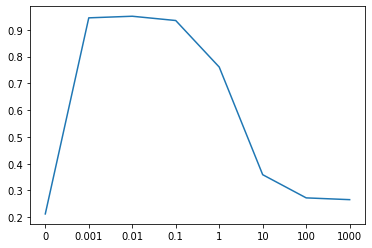

In [10]:
import matplotlib.pyplot as plt
plt.plot(accs)
plt.xticks(np.arange(8), [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
plt.show()

In [11]:
accs

[0.2123834886817576,
 0.9447403462050599,
 0.9507323568575233,
 0.9347536617842876,
 0.7609853528628495,
 0.3588548601864181,
 0.27230359520639147,
 0.26564580559254325]